In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [3]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [4]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [5]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [6]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF')

C:\Users\Affan\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 12353 images belonging to 2 classes.


In [8]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [10]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/mesonet/mesonet/data/.ipynb_checkpoints/

In [11]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 12353 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

Predicted likelihood: 0.0560
Actual label: 0

Correct prediction: True


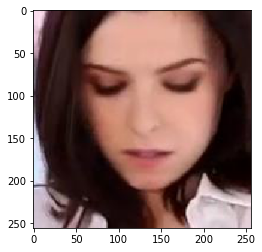

In [12]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [13]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [15]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 10 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

0  predictions completed.
10  predictions completed.
20  predictions completed.
30  predictions completed.
40  predictions completed.
50  predictions completed.
60  predictions completed.
70  predictions completed.
80  predictions completed.
90  predictions completed.
100  predictions completed.
110  predictions completed.
120  predictions completed.
130  predictions completed.
140  predictions completed.
150  predictions completed.
160  predictions completed.
170  predictions completed.
180  predictions completed.
190  predictions completed.
200  predictions completed.
210  predictions completed.
220  predictions completed.
230  predictions completed.
240  predictions completed.
250  predictions completed.
260  predictions completed.
270  predictions completed.
280  predictions completed.
290  predictions completed.
300  predictions completed.
310  predictions completed.
320  predictions completed.
330  predictions completed.
340  predictions completed.
350  predictions completed.
360

2870  predictions completed.
2880  predictions completed.
2890  predictions completed.
2900  predictions completed.
2910  predictions completed.
2920  predictions completed.
2930  predictions completed.
2940  predictions completed.
2950  predictions completed.
2960  predictions completed.
2970  predictions completed.
2980  predictions completed.
2990  predictions completed.
3000  predictions completed.
3010  predictions completed.
3020  predictions completed.
3030  predictions completed.
3040  predictions completed.
3050  predictions completed.
3060  predictions completed.
3070  predictions completed.
3080  predictions completed.
3090  predictions completed.
3100  predictions completed.
3110  predictions completed.
3120  predictions completed.
3130  predictions completed.
3140  predictions completed.
3150  predictions completed.
3160  predictions completed.
3170  predictions completed.
3180  predictions completed.
3190  predictions completed.
3200  predictions completed.
3210  predicti

5700  predictions completed.
5710  predictions completed.
5720  predictions completed.
5730  predictions completed.
5740  predictions completed.
5750  predictions completed.
5760  predictions completed.
5770  predictions completed.
5780  predictions completed.
5790  predictions completed.
5800  predictions completed.
5810  predictions completed.
5820  predictions completed.
5830  predictions completed.
5840  predictions completed.
5850  predictions completed.
5860  predictions completed.
5870  predictions completed.
5880  predictions completed.
5890  predictions completed.
5900  predictions completed.
5910  predictions completed.
5920  predictions completed.
5930  predictions completed.
5940  predictions completed.
5950  predictions completed.
5960  predictions completed.
5970  predictions completed.
5980  predictions completed.
5990  predictions completed.
6000  predictions completed.
6010  predictions completed.
6020  predictions completed.
6030  predictions completed.
6040  predicti

8530  predictions completed.
8540  predictions completed.
8550  predictions completed.
8560  predictions completed.
8570  predictions completed.
8580  predictions completed.
8590  predictions completed.
8600  predictions completed.
8610  predictions completed.
8620  predictions completed.
8630  predictions completed.
8640  predictions completed.
8650  predictions completed.
8660  predictions completed.
8670  predictions completed.
8680  predictions completed.
8690  predictions completed.
8700  predictions completed.
8710  predictions completed.
8720  predictions completed.
8730  predictions completed.
8740  predictions completed.
8750  predictions completed.
8760  predictions completed.
8770  predictions completed.
8780  predictions completed.
8790  predictions completed.
8800  predictions completed.
8810  predictions completed.
8820  predictions completed.
8830  predictions completed.
8840  predictions completed.
8850  predictions completed.
8860  predictions completed.
8870  predicti

11310  predictions completed.
11320  predictions completed.
11330  predictions completed.
11340  predictions completed.
11350  predictions completed.
11360  predictions completed.
11370  predictions completed.
11380  predictions completed.
11390  predictions completed.
11400  predictions completed.
11410  predictions completed.
11420  predictions completed.
11430  predictions completed.
11440  predictions completed.
11450  predictions completed.
11460  predictions completed.
11470  predictions completed.
11480  predictions completed.
11490  predictions completed.
11500  predictions completed.
11510  predictions completed.
11520  predictions completed.
11530  predictions completed.
11540  predictions completed.
11550  predictions completed.
11560  predictions completed.
11570  predictions completed.
11580  predictions completed.
11590  predictions completed.
11600  predictions completed.
11610  predictions completed.
11620  predictions completed.
11630  predictions completed.
11640  pre

In [16]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

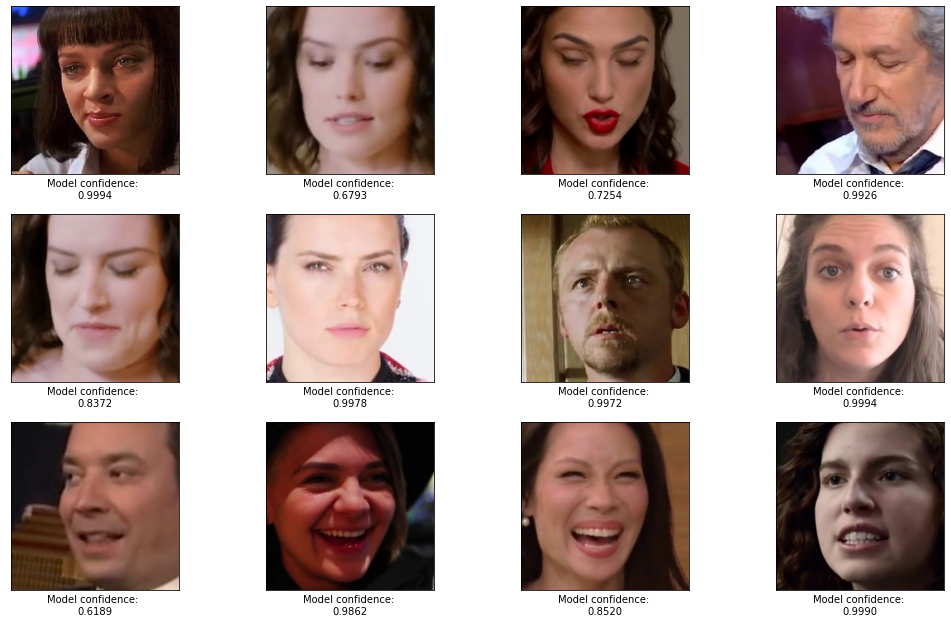

In [17]:
plotter(correct_real, correct_real_pred)

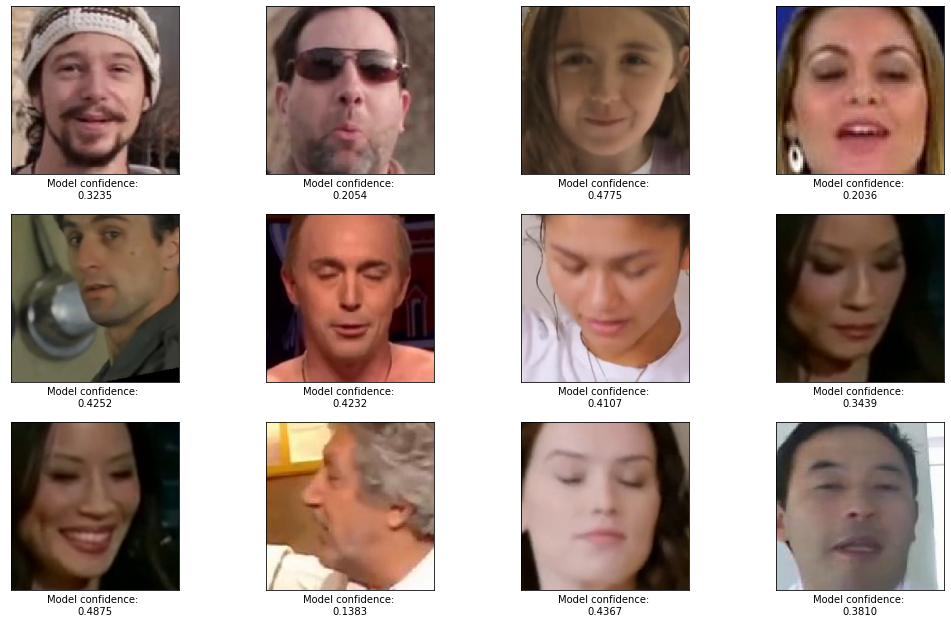

In [18]:
plotter(misclassified_real, misclassified_real_pred)

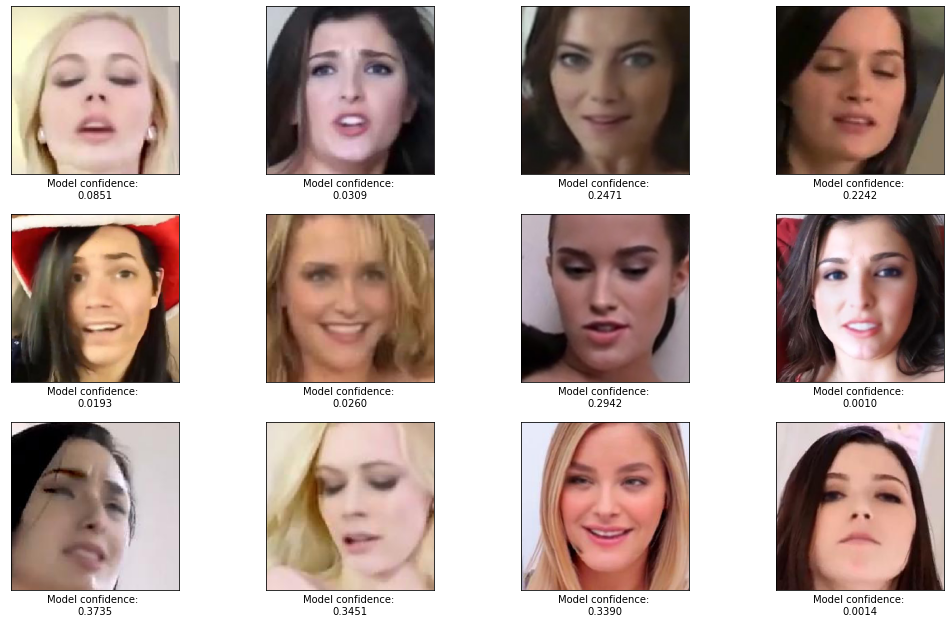

In [19]:
plotter(correct_deepfake, correct_deepfake_pred)

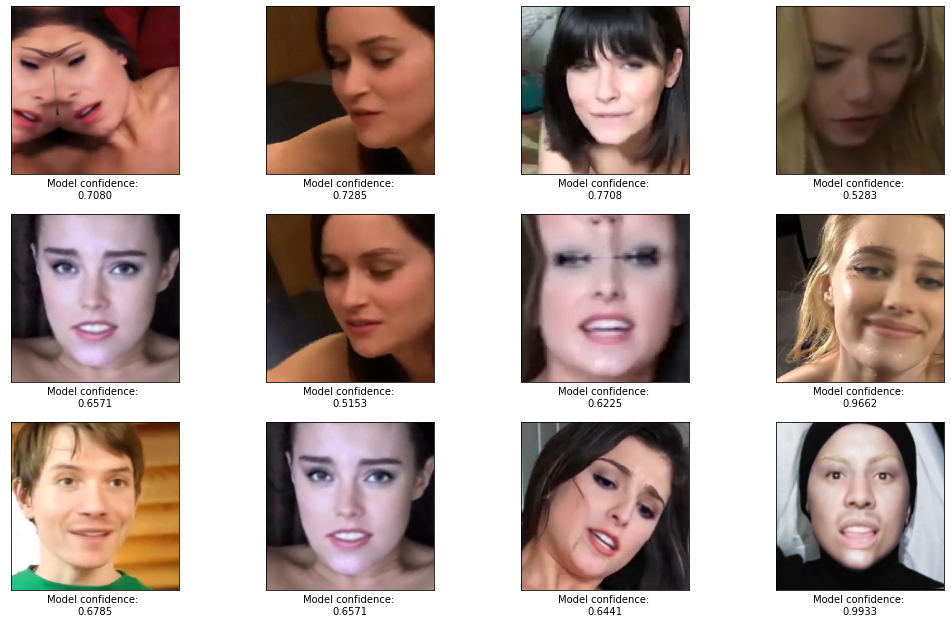

In [20]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)